# 과제 002

주어진 보스톤 주택 가격 데이터 셋을 이용하여 주택 가격을 예측하는 multiple variables regression 을 수행하는 프로그램을 직접 작성하시오.

단, 아래 조건을 만족하여 구현하시오.

* loss 함수: tensorflow 의 MSE
* gradient 계산: tensorflow의 GradientTape()
* optimizer: tensorflow의 Adam

**제출**

구현한 코드가 담긴 colab 파일을 PLATO "텐서플로 과제 제출 01"에 제출하세요. (23/7/6까지)

```python
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data
# features 설명 (http://lib.stat.cmu.edu/datasets/boston)
# 보스톤 주택 가격(MEDV) 예측 (1인당 범죄율, 주택당 평균 방 개수, 학생대 교사 비율 등의 features 이용함)
# MEDV(주택 가격 중앙값, 단위: $1,000)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)
print('x_train.shape', 'y_train.shape', x_train.shape, y_train.shape)

all_train_data = np.hstack((x_train, y_train.reshape((-1, 1))))
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(all_train_data, columns=column_names)
df.head()
sns.pairplot(df[['CRIM', 'ZN', 'INDUS', 'TAX', 'MEDV']], diag_kind='kde')
```

* 힌트:
https://dschloe.github.io/python/tensorflow2.0/ch4_4_boston_housing_deeplearning/

x_train.shape y_train.shape (404, 13) (404,)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 52)                728       
                                                                 
 dense_33 (Dense)            (None, 39)                2067      
                                                                 
 dense_34 (Dense)            (None, 26)                1040      
                                                                 
 dense_35 (Dense)            (None, 1)                 27        
                                                                 
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


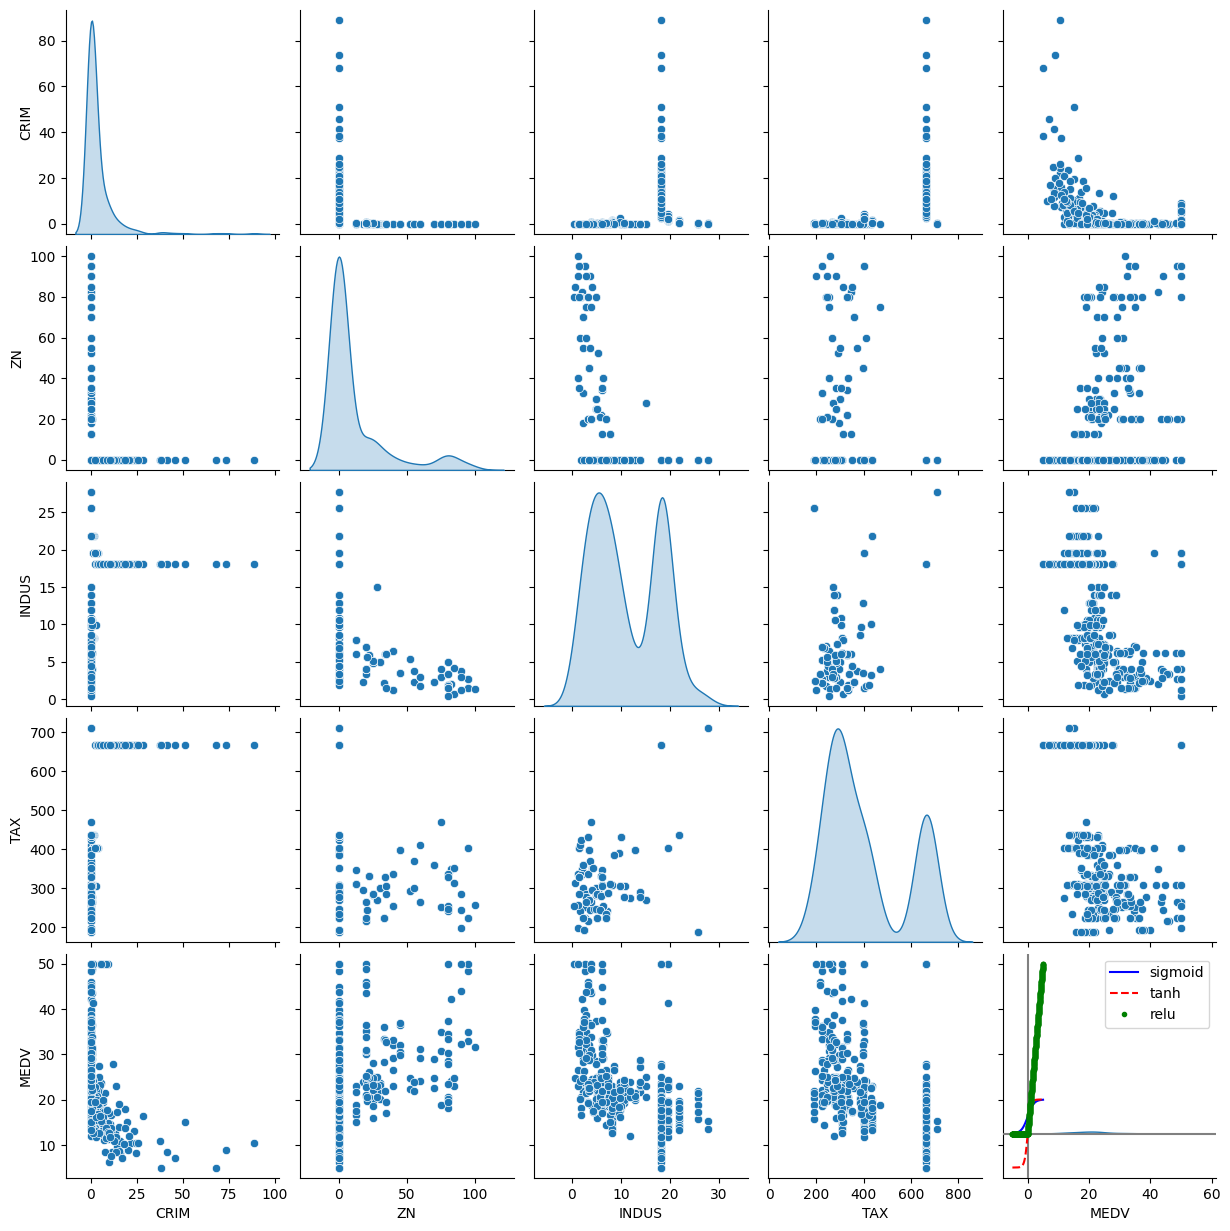

Epoch 1/25
10/10 [==============================] - 1s 10ms/step - loss: 0.7928 - val_loss: 0.8523
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 0.5137 - val_loss: 0.6951
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 0.3693 - val_loss: 0.5859
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2768 - val_loss: 0.4774
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2197 - val_loss: 0.3952
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1861 - val_loss: 0.3336
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1541 - val_loss: 0.3007
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1347 - val_loss: 0.2763
Epoch 9/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1164 - val_loss: 0.2647
Epoch 10/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1043 - val_loss: 0.2423
Epoch 11/25
10/10 

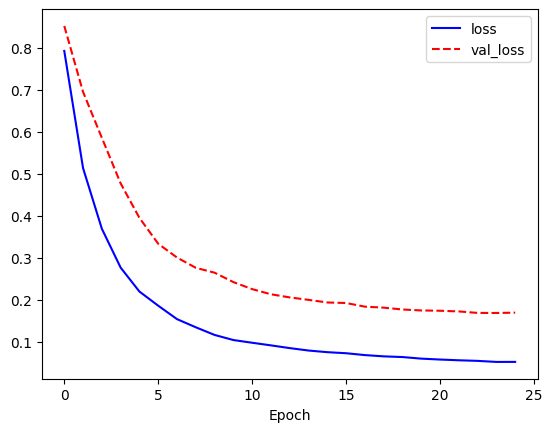

4/4 [==============================] - 0s 1ms/step


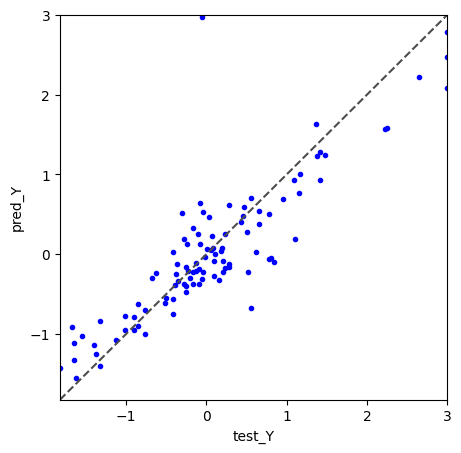

In [21]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)
print('x_train.shape', 'y_train.shape', x_train.shape, y_train.shape)

all_train_data = np.hstack((x_train, y_train.reshape((-1, 1))))
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(all_train_data, columns=column_names)
# df.head()
# print(df)
# df.info()
sns.pairplot(df[['CRIM', 'ZN', 'INDUS', 'TAX', 'MEDV']], diag_kind='kde')

#데이터 정규화(전처리는 NA값이 없어서 진행 안함)
x_mean = x_train.mean(axis=0)
x_std = x_train.std(axis=0)
x_train -= x_mean
x_train /= x_std
x_test -= x_mean
x_test /= x_std

y_mean = y_train.mean(axis=0)
y_std = y_train.std(axis=0)
y_train -= y_mean
y_train /= y_std
y_test -= y_mean
y_test /= y_std

# print(x_train[0])
# print(y_train[0])

#시퀸셜 모델을 활용, 딥러닝 네트워크 학습시킴
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13, )), 
  tf.keras.layers.Dense(units=39, activation='relu'), 
  tf.keras.layers.Dense(units=26, activation='relu'), 
  tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')
model.summary()

#그림 출력 코드
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z < 0 else z for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g.', label='relu')
plt.legend()
plt.show()

#validation_split은 훈련데이터에서 일정 비율로 떼서 학습 결과를 검증하기 위한 것
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_split=0.25)

#위의 코드를 시각화
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#일단 회귀 모형을 평가
model.evaluate(x_test, y_test)

#네트워크가 Y값을 얼마나 잘 예측하는지 확인해보기 위해 실제 주택 가격과 예측 주택 가격을 1:1로 비교해봅니다.
pred_Y = model.predict(x_test)

plt.figure(figsize=(5,5))
plt.plot(y_test, pred_Y, 'b.')
plt.axis([min(y_test), max(y_test), min(y_test), max(y_test)])

# y=x에 해당하는 대각선
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

Epoch: 1 Loss: tf.Tensor(1.0234935, shape=(), dtype=float32)
Epoch: 2 Loss: tf.Tensor(0.9898152, shape=(), dtype=float32)
Epoch: 3 Loss: tf.Tensor(0.98854613, shape=(), dtype=float32)
Epoch: 4 Loss: tf.Tensor(0.98493797, shape=(), dtype=float32)
Epoch: 5 Loss: tf.Tensor(0.98299974, shape=(), dtype=float32)
Epoch: 6 Loss: tf.Tensor(0.9820236, shape=(), dtype=float32)
Epoch: 7 Loss: tf.Tensor(0.9809938, shape=(), dtype=float32)
Epoch: 8 Loss: tf.Tensor(0.9802155, shape=(), dtype=float32)
Epoch: 9 Loss: tf.Tensor(0.97958475, shape=(), dtype=float32)
Epoch: 10 Loss: tf.Tensor(0.97896886, shape=(), dtype=float32)
Epoch: 11 Loss: tf.Tensor(0.97834295, shape=(), dtype=float32)
Epoch: 12 Loss: tf.Tensor(0.97786033, shape=(), dtype=float32)
Epoch: 13 Loss: tf.Tensor(0.9774594, shape=(), dtype=float32)
Epoch: 14 Loss: tf.Tensor(0.9770345, shape=(), dtype=float32)
Epoch: 15 Loss: tf.Tensor(0.97661203, shape=(), dtype=float32)
Epoch: 16 Loss: tf.Tensor(0.9762745, shape=(), dtype=float32)
Epoch: 17

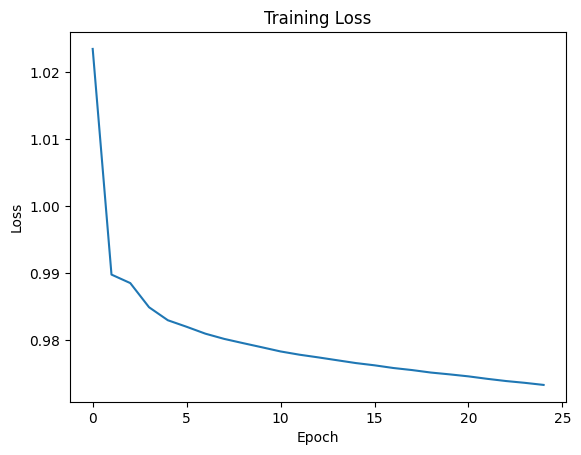

4/4 [==============================] - 0s 1ms/step - loss: 0.9391
Test Loss: 0.9391137957572937


In [26]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing

# Load the Boston Housing Dataset
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

# Normalize the data
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X = (train_X - x_mean) / x_std
test_X = (test_X - x_mean) / x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y = (train_Y - y_mean) / y_std
test_Y = (test_Y - y_mean) / y_std

# Build the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13, )),
  tf.keras.layers.Dense(units=39, activation='relu'),
  tf.keras.layers.Dense(units=26, activation='relu'),
  tf.keras.layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

# Training
epochs = 25
batch_size = 32

def plot_loss(loss_values):
    plt.plot(loss_values)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

loss_values = []
val_loss =[]

for epoch in range(epochs):
    total_loss = 0
    num_batches = 0
    for batch_start in range(0, len(train_X), batch_size):
        batch_end = batch_start + batch_size
        batch_X = train_X[batch_start:batch_end]
        batch_Y = train_Y[batch_start:batch_end]

        with tf.GradientTape() as tape:
            predictions = model(batch_X)
            loss = tf.keras.losses.mean_squared_error(batch_Y, predictions)

        gradients = tape.gradient(loss, model.trainable_variables)
        model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        total_loss += tf.reduce_mean(loss)  # Convert loss to a scalar value
        num_batches += 1

    average_loss = total_loss / num_batches
    loss_values.append(average_loss.numpy())
    print("Epoch:", epoch + 1, "Loss:", average_loss)

# Plot the training loss
plot_loss(loss_values)

# Evaluation
loss = model.evaluate(test_X, test_Y)
print("Test Loss:", loss)

예지니

x_train.shape y_train.shape (404, 13) (404,)
Epoch 1/50
10/10 [==============================] - 1s 10ms/step - loss: 0.7393 - val_loss: 0.9455
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.4828 - val_loss: 0.8524
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 0.3818 - val_loss: 0.7288
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 0.3040 - val_loss: 0.5722
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2488 - val_loss: 0.4507
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2133 - val_loss: 0.3947
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1836 - val_loss: 0.3439
Epoch 8/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1588 - val_loss: 0.2963
Epoch 9/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1451 - val_loss: 0.2550
Epoch 10/50
10/10 [==============================] - 0s 3ms/step - loss:

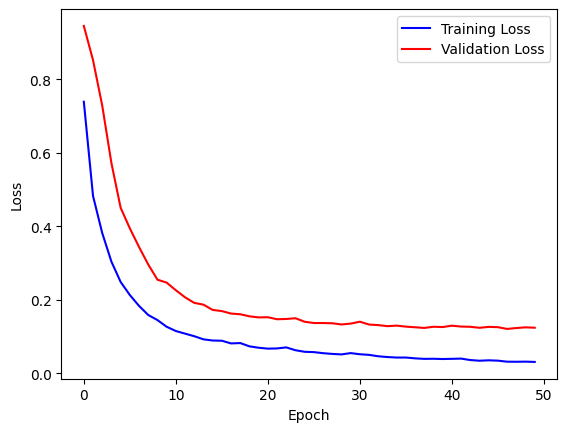

Test Loss: tf.Tensor(1.7702589, shape=(), dtype=float32)


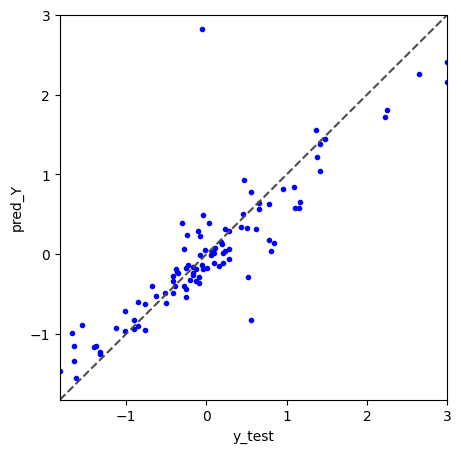

In [31]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

print('x_train.shape', 'y_train.shape', x_train.shape, y_train.shape)


# 데이터 전처리
all_train_data = np.hstack((x_train, y_train.reshape((-1, 1))))
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(all_train_data, columns=column_names)
df.head()

# 데이터 정규화
x_mean = x_train.mean(axis=0) # 평균을 계산하여 변수 x_mean에 할당
x_std = x_train.std(axis=0) # 표준 편차를 계산하여 변수 x_std에 할당
x_train -= x_mean # 평균을 빼고 표준 편차로 나누어 데이터를 정규화
x_train /= x_std # x_train과 x_test의 각 원소에서 x_mean을 뺀 후, x_std로 나누어 표준화
x_test -= x_mean
x_test /= x_std

y_mean = y_train.mean(axis=0)
y_std = y_train.std(axis=0)
y_train -= y_mean
y_train /= y_std
y_test -= y_mean
y_test /= y_std

# 모델 정의
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13, )), 
  tf.keras.layers.Dense(units=39, activation='relu'), 
  tf.keras.layers.Dense(units=26, activation='relu'), 
  tf.keras.layers.Dense(units=1)
])

# loss 함수 및 옵티마이저 설정
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

# 컴파일
model.compile(optimizer=optimizer, loss=loss_fn)

# 학습 함수 정의
@tf.function
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss_value = loss_fn(targets, predictions)
    gradients = tape.gradient(loss_value, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss_value

# 학습
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.25)

# 손실 그래프 출력
plt.plot(history.history['loss'], 'b-', label='Training Loss')
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 평가
test_loss = loss_fn(y_test, model(x_test))
print('Test Loss:', test_loss)

# 예측 결과 그래프 출력
pred_Y = model(x_test)

plt.figure(figsize=(5, 5))
plt.plot(y_test, pred_Y, 'b.')
plt.axis([min(y_test), max(y_test), min(y_test), max(y_test)])
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], ls="--", c=".3")
plt.xlabel('y_test')
plt.ylabel('pred_Y')
plt.show()

지으니

x_train.shape y_train.shape (404, 13) (404,)
Epoch 1/50
65/65 [==============================] - 0s 2ms/step - loss: 0.7898 - val_loss: 0.5224
Epoch 2/50
65/65 [==============================] - 0s 781us/step - loss: 0.3912 - val_loss: 0.3662
Epoch 3/50
65/65 [==============================] - 0s 797us/step - loss: 0.3003 - val_loss: 0.3122
Epoch 4/50
65/65 [==============================] - 0s 813us/step - loss: 0.2292 - val_loss: 0.2224
Epoch 5/50
65/65 [==============================] - 0s 797us/step - loss: 0.1807 - val_loss: 0.1823
Epoch 6/50
65/65 [==============================] - 0s 813us/step - loss: 0.1493 - val_loss: 0.1727
Epoch 7/50
65/65 [==============================] - 0s 828us/step - loss: 0.1244 - val_loss: 0.1752
Epoch 8/50
65/65 [==============================] - 0s 797us/step - loss: 0.1160 - val_loss: 0.1690
Epoch 9/50
65/65 [==============================] - 0s 813us/step - loss: 0.1069 - val_loss: 0.1610
Epoch 10/50
65/65 [==============================] - 0s 7

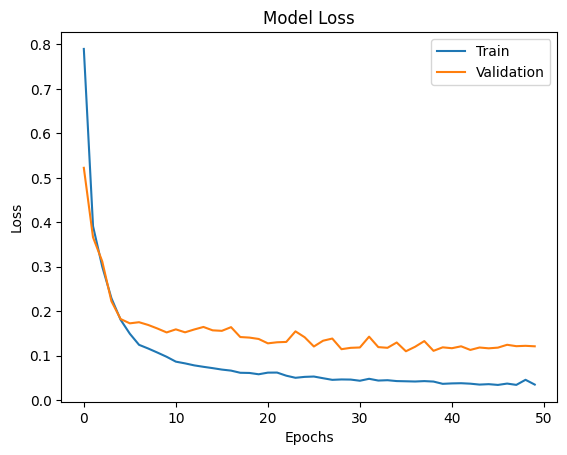

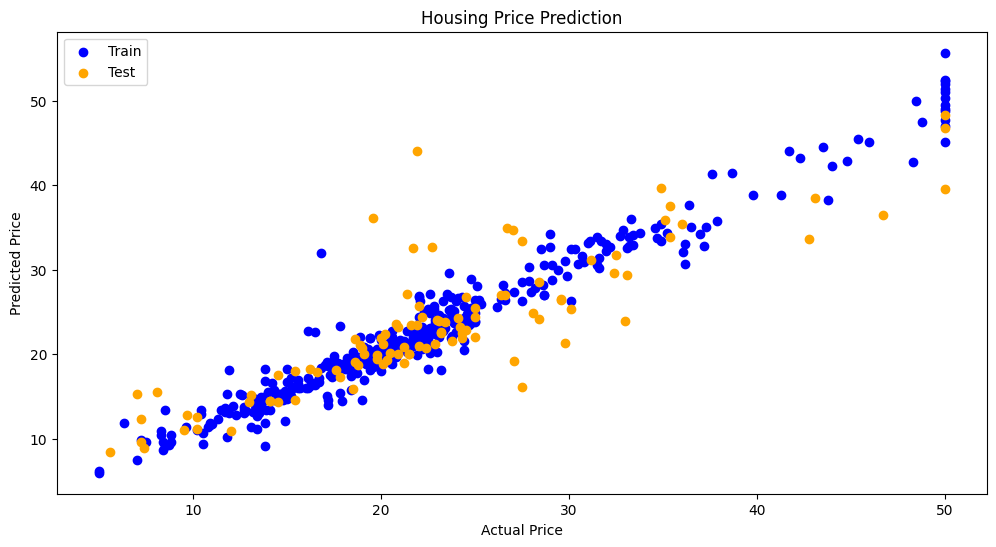

In [33]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow.python.keras as keras
from tensorflow.python.keras import layers
from sklearn.metrics import r2_score

# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data
# features 설명 (http://lib.stat.cmu.edu/datasets/boston)
# 보스톤 주택 가격(MEDV) 예측 (1인당 범죄율, 주택당 평균 방 개수, 학생대 교사 비율 등의 features 이용함)
# MEDV(주택 가격 중앙값, 단위: $1,000)

## x_train = 독립 변수 dataset , y_train = 종속 변수 dataset(MEDV(주택가격 중앙값))
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113 
) # train_test_split ; 8:2
print('x_train.shape', 'y_train.shape', x_train.shape, y_train.shape)

## .hstack() = np array 수평으로 결합 -> 주어진 배열을 좌우로 연결해 새로운 배열 형성
all_train_data = np.hstack((x_train, y_train.reshape((-1, 1)))) #reshape() 활용해 2차원 배열로 변환(-1 ; 차원의 크기 자동지정)

## column name setting
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

## DataFrame으로 변환
df = pd.DataFrame(all_train_data, columns=column_names)
df.describe() # 기술 통계량 확인

## nomalization
x_mean = x_train.mean(axis=0)
x_std = x_train.std(axis=0)
x_train -= x_mean
x_train /= x_std
x_test -= x_mean
x_test /= x_std

y_mean = y_train.mean(axis=0)
y_std = y_train.std(axis=0)
y_train -= y_mean
y_train /= y_std
y_test -= y_mean
y_test /= y_std

# model train
model = keras.Sequential([
    ## input layer(input_shape은 입력층에만 추가
    layers.Dense(units=16, activation='relu',input_shape=(13,)), ##input_shape ; 종속변수 하나를 제외한 feature의 갯수
    ## hidden layers
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    ## ouput layer(주택 가격을 하나의 값으로 예측하므로 뉴런수 = 1로 지정)
    layers.Dense(units=1) ## 출력층에 활성화 함수를 따로 지정하지 않으면 linear 함수가 적용(회귀문제에서 사용되는 일반적인 방법)
    ])

# model compile
# optimizer : 모델의 가중치 업데이트 방법 정의, loss : 모델의 성능을 평가, metrics : 모델의 성능을 평가하는데 사용되는 metric의 리스트)
model.compile(optimizer='adam', loss='mse')
# model.summary()

# model fitting
# (feature_data, target_data, epochs(전체 데이터셋을 학습하는데 사용되는 에포크 수),batch_size(한 번에 처리되는 샘플의 갯수))
history = model.fit(x_train, y_train, epochs=50, batch_size=5, validation_split=0.2)


y_pred_train = model.predict(x_train) * y_std + y_mean
y_pred_test = model.predict(x_test) * y_std + y_mean

## model 정확도 확인
# R-squared 계산
train_r2 = r2_score(y_train * y_std + y_mean, y_pred_train)
test_r2 = r2_score(y_test * y_std + y_mean, y_pred_test)

## 정확도 출력
print("Train 정확도: ", train_r2)
print("Test 정확도 : ", test_r2)

# loss func
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# 집값 예측 그래프
plt.figure(figsize=(12, 6))
plt.scatter(y_train * y_std + y_mean, y_pred_train, label='Train', color='blue')
plt.scatter(y_test * y_std + y_mean, y_pred_test, label='Test', color='orange')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Housing Price Prediction')
plt.legend()
plt.show()
# sns.pairplot(df[['CRIM', 'ZN', 'INDUS', 'TAX', 'MEDV']], diag_kind='kde')